In [2]:
import pandas as pd
import allel
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_merge = pd.read_csv('../Data/analysis_files/df_merged.csv')

In [4]:
print(df_merge)

     Unnamed: 0         tool  threshold strain  nTP    nFP   nTN  n_true  nFN  \
0             0    BioGraph*         10  AKR_J   36    389   206     504  468   
1             1    BioGraph*        100  AKR_J  249    176   289     504  255   
2             2    BioGraph*       1000  AKR_J  269    156   299     504  235   
3             3    BioGraph*      10000  AKR_J  291    134   347     504  213   
4             4  breakdancer         10  AKR_J    9    527   253     504  495   
..          ...          ...        ...    ...  ...    ...   ...     ...  ...   
471         471     sniffles        100   LP_J  121     65   366     483  362   
472         472     sniffles       1000   LP_J  129     57   369     483  354   
473         473     sniffles      10000   LP_J  143     43   382     483  340   
474         474         gasv         10   LP_J    0  11605     9     483  483   
475         475        crest         10   LP_J    0    299  3517     483  483   

     sensitivity  precision

# Figure 3a - Sensitivity

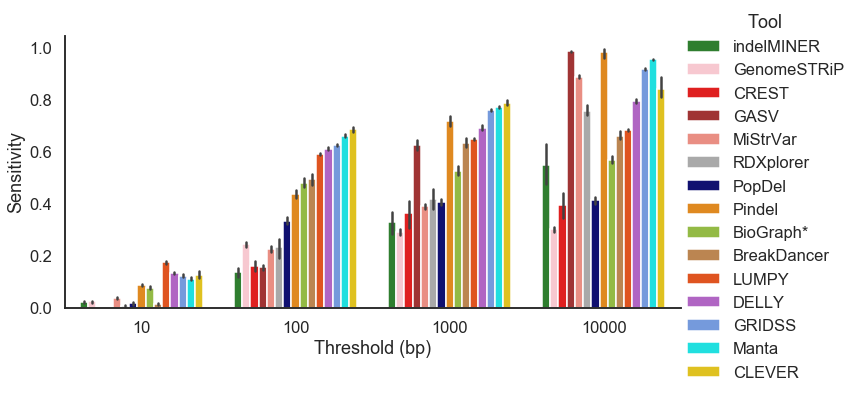

In [5]:
%store -r
fig2a=sns.set_style("white")
fig2a=sns.set_context("talk")

fig_order = ["indelminer","genomestrip","crest","gasv","mistrvar","rdxplorer","popdel","pindel","BioGraph*","breakdancer","smoove","delly","gridss","manta_candidateSV","clever"]
labels    = ["indelMINER","GenomeSTRiP","CREST","GASV","MiStrVar","RDXplorer","PopDel","Pindel","BioGraph*","BreakDancer","LUMPY","DELLY","GRIDSS","Manta","CLEVER"]
df_merge["Tool"] = df_merge["tool"].map(dict(zip(fig_order, labels)))

pal = []
for tool in fig_order:
    pal.append(color_map[tool])

fig2a = sns.catplot(x="threshold", y="sensitivity", kind="bar",errwidth=2.5,data = df_merge,hue="Tool",aspect=2.0, palette=pal,hue_order=labels)
fig2a.set(xlabel='Threshold (bp)', ylabel='Sensitivity')
fig2a=sns.despine()
plt.xticks(rotation=0)
#plt.show(fig2a)

plt.savefig("../figures/fig3/fig3a", bbox_inches='tight')
plt.savefig("../figures/fig3/fig3a.pdf", bbox_inches='tight')

# Figure 3b - Precision

In [6]:
# df_merge.loc[df_merge["tool"]=="popdel"]
# df_mean.loc[df_mean['threshold'] == 100]

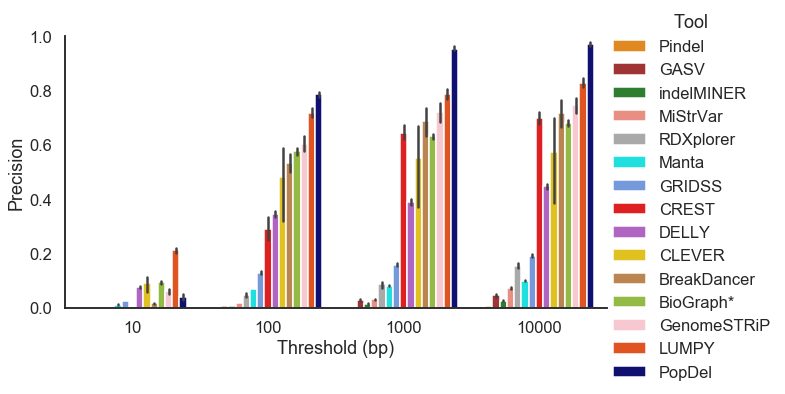

In [9]:
%store -r
fig2b=sns.set_style("white")
fig2b=sns.set_context("talk")
fig_order = ['pindel','gasv','indelminer',
             'mistrvar','rdxplorer','manta_candidateSV','gridss',
            'crest','delly','clever',
            'breakdancer','BioGraph*','genomestrip','smoove','popdel']
labels = ['Pindel','GASV','indelMINER',
             'MiStrVar','RDXplorer','Manta','GRIDSS',
            'CREST','DELLY','CLEVER',
            'BreakDancer','BioGraph*','GenomeSTRiP','LUMPY','PopDel']

pal = []
for tool in fig_order:
    pal.append(color_map[tool])

fig2b = sns.catplot(x="threshold", y="precision", kind="bar",errwidth=2.5,data = df_merge,hue='Tool',aspect=1.8, palette=pal,hue_order=labels)
plt.ylim(0, 1)
fig2b.set(xlabel='Threshold (bp)', ylabel='Precision')
fig2b=sns.despine()
#plt.show(fig2b)

plt.savefig("../figures/fig3/fig3b", bbox_inches='tight')
plt.savefig("../figures/fig3/fig3b.pdf", bbox_inches='tight')

# Figure 3c - Specificity

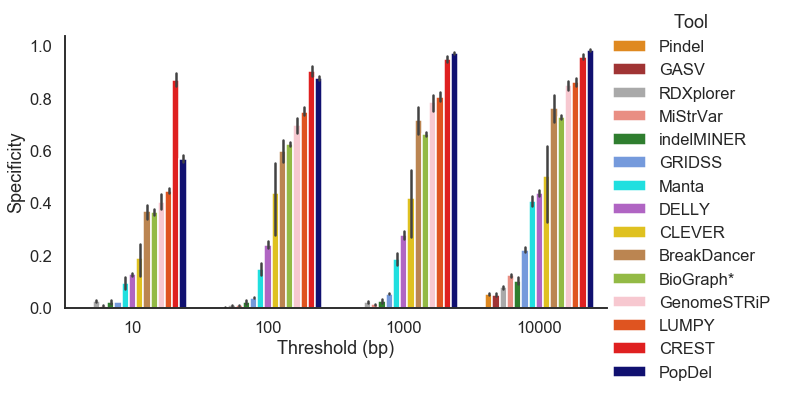

In [11]:
%store -r
fig2c=sns.set_style("white")
fig2c=sns.set_context("talk")

fig_order = ["pindel","gasv","rdxplorer","mistrvar","indelminer","gridss","manta_candidateSV","delly","clever","breakdancer","BioGraph*","genomestrip","smoove","crest","popdel"]
labels = ["Pindel","GASV","RDXplorer","MiStrVar","indelMINER","GRIDSS","Manta","DELLY","CLEVER","BreakDancer","BioGraph*","GenomeSTRiP","LUMPY","CREST","PopDel"]

pal = []
for tool in fig_order:
    pal.append(color_map[tool])


fig2c = sns.catplot(x="threshold", y="specificity", kind="bar",errwidth=2.5,data = df_merge,hue='Tool',aspect=1.8, palette=pal,hue_order=labels)
fig2c.set(xlabel='Threshold (bp)', ylabel='Specificity')
fig2c=sns.despine()
#plt.show(fig2c)

plt.savefig("../figures/fig3/fig3c", bbox_inches='tight')
plt.savefig("../figures/fig3/fig3c.pdf", bbox_inches='tight')

# Figure 3d - F-score

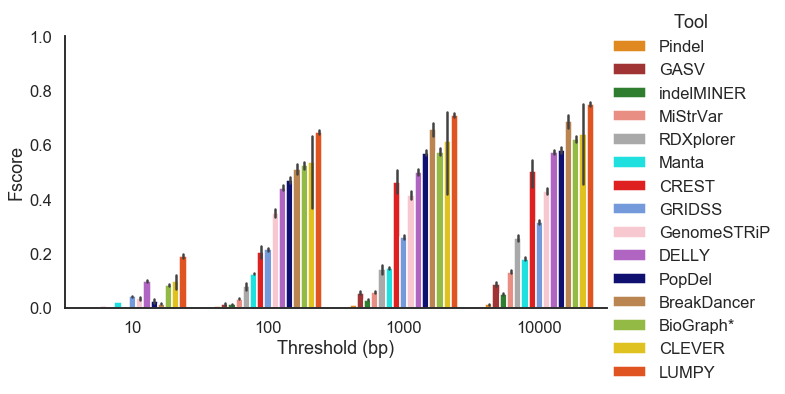

In [13]:
%store -r
fig2d=sns.set_style("white")
fig2d=sns.set_context("talk")

fig_order = ["pindel","gasv","indelminer","mistrvar","rdxplorer","manta_candidateSV","crest","gridss","genomestrip","delly","popdel","breakdancer","BioGraph*","clever","smoove"]

labels = ["Pindel","GASV","indelMINER","MiStrVar","RDXplorer","Manta","CREST","GRIDSS","GenomeSTRiP","DELLY","PopDel","BreakDancer","BioGraph*","CLEVER","LUMPY"]
pal = []
for tool in fig_order:
    pal.append(color_map[tool])

fig2d = sns.catplot(x="threshold", y="f-score", kind="bar",errwidth=2.5,data = df_merge,hue='Tool',aspect=1.8, palette=pal,hue_order=labels)
fig2d.set(xlabel='Threshold (bp)', ylabel='Fscore')
fig2d=sns.despine()
plt.ylim(0, 1)
#plt.show(fig2d)

plt.savefig("../figures/fig3/fig3d", bbox_inches='tight')
plt.savefig("../figures/fig3/fig3d.pdf", bbox_inches='tight')

In [14]:
df_mean=df_merge.groupby(['tool','threshold'],as_index=False).mean()
df_mean.head()

,tool,threshold,Unnamed: 0,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score
0,BioGraph*,10,204.0,42.428571,411.142857,238.857143,542.714286,500.285714,0.078281,0.093773,0.367228,0.085301
1,BioGraph*,100,205.0,261.000000,192.571429,321.285714,542.714286,281.714286,0.481218,0.576129,0.625650,0.524250
2,BioGraph*,1000,206.0,286.285714,167.285714,333.000000,542.714286,256.428571,0.527502,0.631530,0.665834,0.574669
3,BioGraph*,10000,207.0,309.000000,144.571429,388.142857,542.714286,233.714286,0.569452,0.681937,0.728891,0.620445
4,breakdancer,10,208.0,8.285714,497.714286,289.428571,542.714286,534.428571,0.015434,0.016424,0.368414,0.015859


# Figure 3e

In [15]:
color_map1 = {'BioGraph*':'yellowgreen', 'BreakDancer':'peru', 'CLEVER':'gold', 'DELLY':'darkorange', 'DELLY':'mediumorchid', 
             'GASV':'firebrick', 'GRIDSS':'cornflowerblue', 'indelMINER':'forestgreen', 
             'MiStrVar':'salmon', 'Pindel':'darkorange', 'PopDel':'navy', 'RDXplorer':'darkgray', 
             'LUMPY':'orangered', 'true deletions':'black', 'CREST':'red', 'GenomeSTRiP':'pink','Manta':'aqua'}

In [16]:
fig_order = ["pindel","gasv","indelminer","mistrvar","rdxplorer","gridss","delly","popdel","breakdancer","BioGraph*","clever","smoove","crest","genomestrip","manta_candidateSV"]
labels = ["Pindel","GASV","indelMINER","MiStrVar","RDXplorer","GRIDSS","DELLY","PopDel","BreakDancer","BioGraph*","CLEVER","LUMPY","CREST","GenomeSTRiP","Manta"]
df_mean["Tool"] = df_mean["tool"].map(dict(zip(fig_order, labels)))

In [17]:
df_mean.loc[df_mean['threshold'] == 100]

,tool,threshold,Unnamed: 0,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score,Tool
1,BioGraph*,100,205.0,261.000000,192.571429,321.285714,542.714286,281.714286,0.481218,0.576129,0.625650,0.524250,BioGraph*
5,breakdancer,100,209.0,269.000000,237.000000,354.714286,542.714286,273.714286,0.495073,0.533950,0.600475,0.512197,BreakDancer
9,clever,100,213.0,373.285714,1591.857143,280.428571,542.714286,169.428571,0.687630,0.480740,0.438855,0.535614,CLEVER
13,crest,100,216.0,87.142857,220.857143,2354.285714,542.714286,455.571429,0.160326,0.289534,0.905869,0.205136,CREST
17,delly,100,220.0,332.714286,634.857143,201.285714,542.714286,210.000000,0.613310,0.344820,0.241920,0.441296,DELLY
21,gasv,100,223.0,85.285714,11698.285714,13.285714,542.714286,457.428571,0.156235,0.007331,0.001160,0.013994,GASV
25,genomestrip,100,227.0,132.285714,87.285714,204.142857,542.714286,410.428571,0.244561,0.603770,0.698914,0.347888,GenomeSTRiP
29,gridss,100,231.0,339.857143,2280.571429,90.857143,542.714286,202.857143,0.626500,0.130083,0.038354,0.215390,GRIDSS
33,indelminer,100,235.0,74.285714,11143.000000,246.714286,542.714286,468.428571,0.136571,0.006657,0.023220,0.012675,indelMINER
37,lumpexpress,100,239.0,319.857143,339.142857,675.285714,542.714286,222.857143,0.589293,0.486417,0.665848,0.532698,NaN


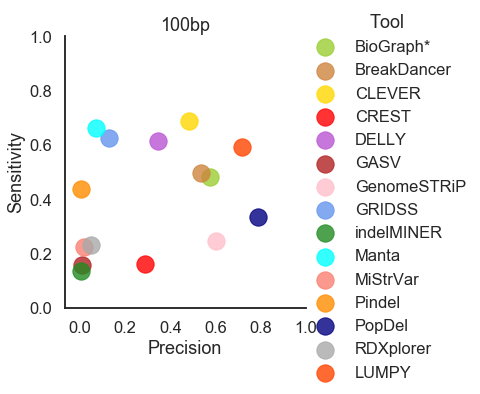

In [18]:
import matplotlib.pyplot as plt
import numpy as np
for th in [100]:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    
    g=sns.lmplot(data=df_mean.loc[df_mean['threshold'] == th], x='precision', y='sensitivity', hue='Tool',fit_reg=False,aspect=1,scatter_kws={"s": 300}, palette=color_map1)
    g.set(xlabel='Precision', ylabel='Sensitivity')
    plt.title(str(th)+"bp")
    ticks=[0,0.2,0.4,0.6,0.8,1]
    g.ax.set_xticks(ticks)
    g.ax.set_yticks(ticks)

    g=sns.despine()
plt.savefig("../figures/fig3/fig3e.pdf", bbox_inches='tight')
plt.savefig("../figures/fig3/fig3e", bbox_inches='tight')

# Figure 3f

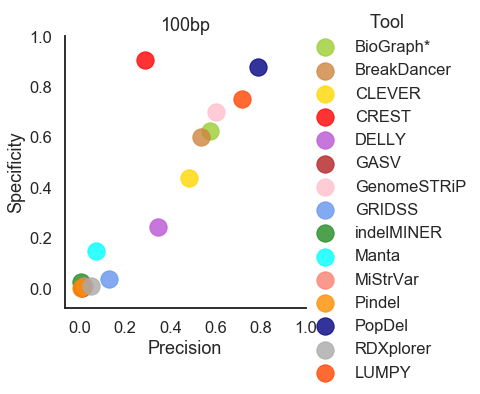

In [19]:
for th in [100]:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    
    g=sns.lmplot(data=df_mean.loc[df_mean['threshold'] == th], x='precision', y='specificity', hue='Tool',fit_reg=False,aspect=1,scatter_kws={"s": 300}, palette=color_map1)
    g.set(xlabel='Precision', ylabel='Specificity')
    plt.title(str(th)+"bp")
    ticks=[0,0.2,0.4,0.6,0.8,1]
    g.ax.set_xticks(ticks)
    g.ax.set_yticks(ticks)
    g=sns.despine()
plt.savefig("../figures/fig3/fig3f.pdf", bbox_inches='tight')
plt.savefig("../figures/fig3/fig3f", bbox_inches='tight')